In [55]:
import numpy as np
import pandas as pd
dataset = pd.read_csv('train.csv')
print(dataset.shape)

(7395, 27)


In [56]:
# we want only the data with the text and the labels...all numerical vars are ignored for now

datasetX = dataset.loc[:, ['boilerplate']]

In [57]:
datasetX = datasetX['boilerplate'].str.replace('"',' ')
print(datasetX.head())

0    { title : IBM Sees Holographic Calls Air Breat...
1    { title : The Fully Electronic Futuristic Star...
2    { title : Fruits that Fight the Flu fruits tha...
3    { title : 10 Foolproof Tips for Better Sleep  ...
4    { title : The 50 Coolest Jerseys You Didn t Kn...
Name: boilerplate, dtype: object


In [58]:
datasetY = dataset.loc[:, ['label']]

In [59]:
print(datasetY.head())

   label
0      0
1      1
2      1
3      1
4      0


In [60]:
datasetX_array = np.array(datasetX)

In [61]:
datasetX_tokens = []
for line in datasetX:
    tokens = line.split()
    datasetX_tokens.append(tokens)

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from gensim.models.word2vec import Word2Vec
from collections import Counter, defaultdict
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import StratifiedShuffleSplit

In [63]:
model = Word2Vec(datasetX_tokens, size=100, window=5, min_count=5, workers=2)

In [64]:
w2v = {w: vec for w, vec in zip(model.wv.index2word, model.wv.syn0)}

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(datasetX_tokens, datasetY, test_size=0.20, random_state=42)

In [66]:
y_test = np.array(y_test)
y_test = y_test.ravel()
y_test

array([1, 1, 1, ..., 1, 1, 1])

In [67]:
y_train = np.array(y_train)
y_train = y_train.ravel()
y_train

array([0, 1, 0, ..., 1, 1, 0])

In [68]:
X_train = np.array(X_train)
X_test = np.array(X_test)

In [69]:
vocab = list(model.wv.vocab)
vocab_set = set(vocab)

In [70]:
sum_array = 0
counter = 0
final_list = []
for i in range(0,len(X_train[1]),1):
    if X_train[1][i] in vocab:
        sum_array += model.wv[X_train[1][i]]
        counter += 1

final_list.append(list(sum_array/counter))

In [71]:
import datetime

In [72]:
from datetime import datetime
start_time = datetime.now()

In [73]:
start_time = datetime.now()
final_list2 = []
for k in range(0,len(X_test),1):
    sum_array = 0
    counter = 0
    for i in range(0,len(X_test[k]),1):
        if X_test[k][i] in vocab_set:
            sum_array += model.wv[X_test[k][i]]
            counter += 1

    final_list2.append(list(sum_array/counter))
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Duration: 0:00:02.816145


In [74]:
y_train_test = y_train

In [75]:
final_list2_array = np.array(final_list2)

In [76]:
y_test_test = y_test

In [77]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
from sklearn import metrics

In [79]:
start_time = datetime.now()
final_list = []
for k in range(0,len(X_train),1):
    sum_array = 0
    counter = 0
    for i in range(0,len(X_train[k]),1):
        if X_train[k][i] in vocab_set:
            sum_array += model.wv[X_train[k][i]]
            counter += 1

    final_list.append(list(sum_array/counter))
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Duration: 0:00:11.347619


In [80]:
final_list_array = np.array(final_list)

In [81]:
forest = RandomForestClassifier(n_estimators=10)
forest.fit(final_list_array, y_train_test)
y_pred = forest.predict(final_list2_array)
print(metrics.accuracy_score(y_test_test, y_pred))
y_pred2 = forest.predict_proba(final_list2_array)
y_pred2 = y_pred2[:,1]
print(metrics.roc_auc_score(y_test_test, y_pred2))

0.774171737661
0.848029335918


In [82]:
# now we are ready to run models on the vectorized text data, lets import everything we will need
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

In [83]:
# logistic regression

logreg = LogisticRegression()

logreg.fit(final_list_array, y_train_test)
y_pred = logreg.predict(final_list2_array)
print(metrics.accuracy_score(y_test_test, y_pred))
y_pred2 = logreg.predict_proba(final_list2_array)
y_pred2 = y_pred2[:,1]
print(metrics.roc_auc_score(y_test_test, y_pred2))

0.811359026369
0.868711706933


In [84]:
from sklearn.naive_bayes import BernoulliNB
nb = BernoulliNB()
nbcl = nb.fit(final_list_array, y_train_test)
y_pred = nbcl.predict(final_list2_array)
print(metrics.accuracy_score(y_test_test, y_pred))
y_pred2 = nbcl.predict_proba(final_list2_array)
y_pred2 = y_pred2[:,1]
print(metrics.roc_auc_score(y_test_test, y_pred2))

0.754563894523
0.803485926441


In [85]:
knn3 = KNeighborsClassifier(n_neighbors=3, algorithm='brute')

In [86]:
knn3.fit(final_list_array, y_train_test)
y_pred = knn3.predict(final_list2_array)
print(metrics.accuracy_score(y_test_test, y_pred))
y_pred2 = knn3.predict_proba(final_list2_array)
y_pred2 = y_pred2[:,1]
print(metrics.roc_auc_score(y_test_test, y_pred2))

0.775524002705
0.821703824277


In [41]:
# SVM classifier

clf = svm.SVC(probability=True)

clf.fit(final_list_array, y_train_test)
y_pred = clf.predict(final_list2_array)
print(metrics.accuracy_score(y_test_test, y_pred))
y_pred2 = clf.predict_proba(final_list2_array)
y_pred2 = y_pred2[:,1]
print(metrics.roc_auc_score(y_test_test, y_pred2))

0.799864773496
0.87106095799


In [87]:
f = open("glove.6B.300d.txt",'r')
model = {}
for line in f:
    splitLine = line.split()
    word = splitLine[0]
    embedding = np.array([float(val) for val in splitLine[1:]])
    model[word] = embedding
print("Done.")
print(len(model))
print("words loaded!")

Done.
400000
words loaded!


In [88]:
word2vec_list = list(model)
word2vec_set = set(word2vec_list)

In [89]:
start_time = datetime.now()
final_listg = []
for k in range(0,len(X_train),1):
    sum_array = 0
    counter = 0
    for i in range(0,len(X_train[k]),1):
        if X_train[k][i] in word2vec_set:
            sum_array += model[X_train[k][i]]
            counter += 1

    final_listg.append(list(sum_array/counter))
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Duration: 0:00:05.661691


In [90]:
final_list_array = np.array(final_listg)

In [91]:
start_time = datetime.now()
final_listg2 = []
for k in range(0,len(X_test),1):
    sum_array = 0
    counter = 0
    for i in range(0,len(X_test[k]),1):
        if X_test[k][i] in word2vec_set:
            sum_array += model[X_test[k][i]]
            counter += 1

    final_listg2.append(list(sum_array/counter))
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Duration: 0:00:01.446202


In [92]:
final_list2_array = np.array(final_listg2)

In [93]:
forest = RandomForestClassifier(n_estimators=10)
forest.fit(final_list_array, y_train_test)
y_pred = forest.predict(final_list2_array)
print(metrics.accuracy_score(y_test_test, y_pred))
y_pred2 = forest.predict_proba(final_list2_array)
y_pred2 = y_pred2[:,1]
print(metrics.roc_auc_score(y_test_test, y_pred2))

0.774847870183
0.840211606343


In [100]:
# logistic regression

logreg = LogisticRegression()

logreg.fit(final_list_array, y_train_test)
y_pred = logreg.predict(final_list2_array)
print(metrics.accuracy_score(y_test_test, y_pred))
y_pred2 = logreg.predict_proba(final_list2_array)
y_pred2 = y_pred2[:,1]
print(metrics.roc_auc_score(y_test_test, y_pred2))

0.809330628803
0.876878760722


In [95]:
nb = BernoulliNB()
nbcl = nb.fit(final_list_array, y_train_test)
y_pred = nbcl.predict(final_list2_array)
print(metrics.accuracy_score(y_test_test, y_pred))
y_pred2 = nbcl.predict_proba(final_list2_array)
y_pred2 = y_pred2[:,1]
print(metrics.roc_auc_score(y_test_test, y_pred2))

0.786342123056
0.838913985771


In [96]:
knn3.fit(final_list_array, y_train_test)
y_pred = knn3.predict(final_list2_array)
print(metrics.accuracy_score(y_test_test, y_pred))
y_pred2 = knn3.predict_proba(final_list2_array)
y_pred2 = y_pred2[:,1]
print(metrics.roc_auc_score(y_test_test, y_pred2))

0.774171737661
0.822659436326


In [52]:
clf = svm.SVC(probability=True)

clf.fit(final_list_array, y_train_test)
y_pred = clf.predict(final_list2_array)
print(metrics.accuracy_score(y_test_test, y_pred))
y_pred2 = clf.predict_proba(final_list2_array)
y_pred2 = y_pred2[:,1]
print(metrics.roc_auc_score(y_test_test, y_pred2))

0.778228532792
0.866745615158


0.876878760722


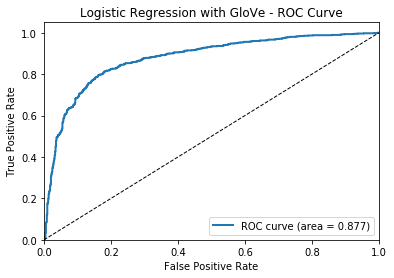

In [102]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds=roc_curve(y_test_test, y_pred2)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test_test, y_pred2)
    roc_auc[i] = auc(fpr[i], tpr[i])

print(metrics.roc_auc_score(y_test_test, y_pred2))
plt.figure()
plt.plot(fpr[1], tpr[1],lw=2, label='ROC curve (area = %0.3f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression with GloVe - ROC Curve')
plt.legend(loc="lower right")
plt.show()
